In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno
from statsmodels.graphics.mosaicplot import mosaic

In [8]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["figure.dpi"] = 100
plt.style.use('bmh')

# 1. Import danych i podstawowe informacje o zbiorze

In [9]:
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [13]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [15]:
df = df.rename(columns={'y':'target',\
           'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_ind', 'cons.conf.idx':'cons_conf_ind', 'nr.employed':'nr_employed'})
df['target'] = df.target.map({'yes':1,'no':0})
df = df.astype({'target':'int0'})

# 2. Podstawowe wykresy, na ktorych bedzie mozna przyblizyc sobie dataset

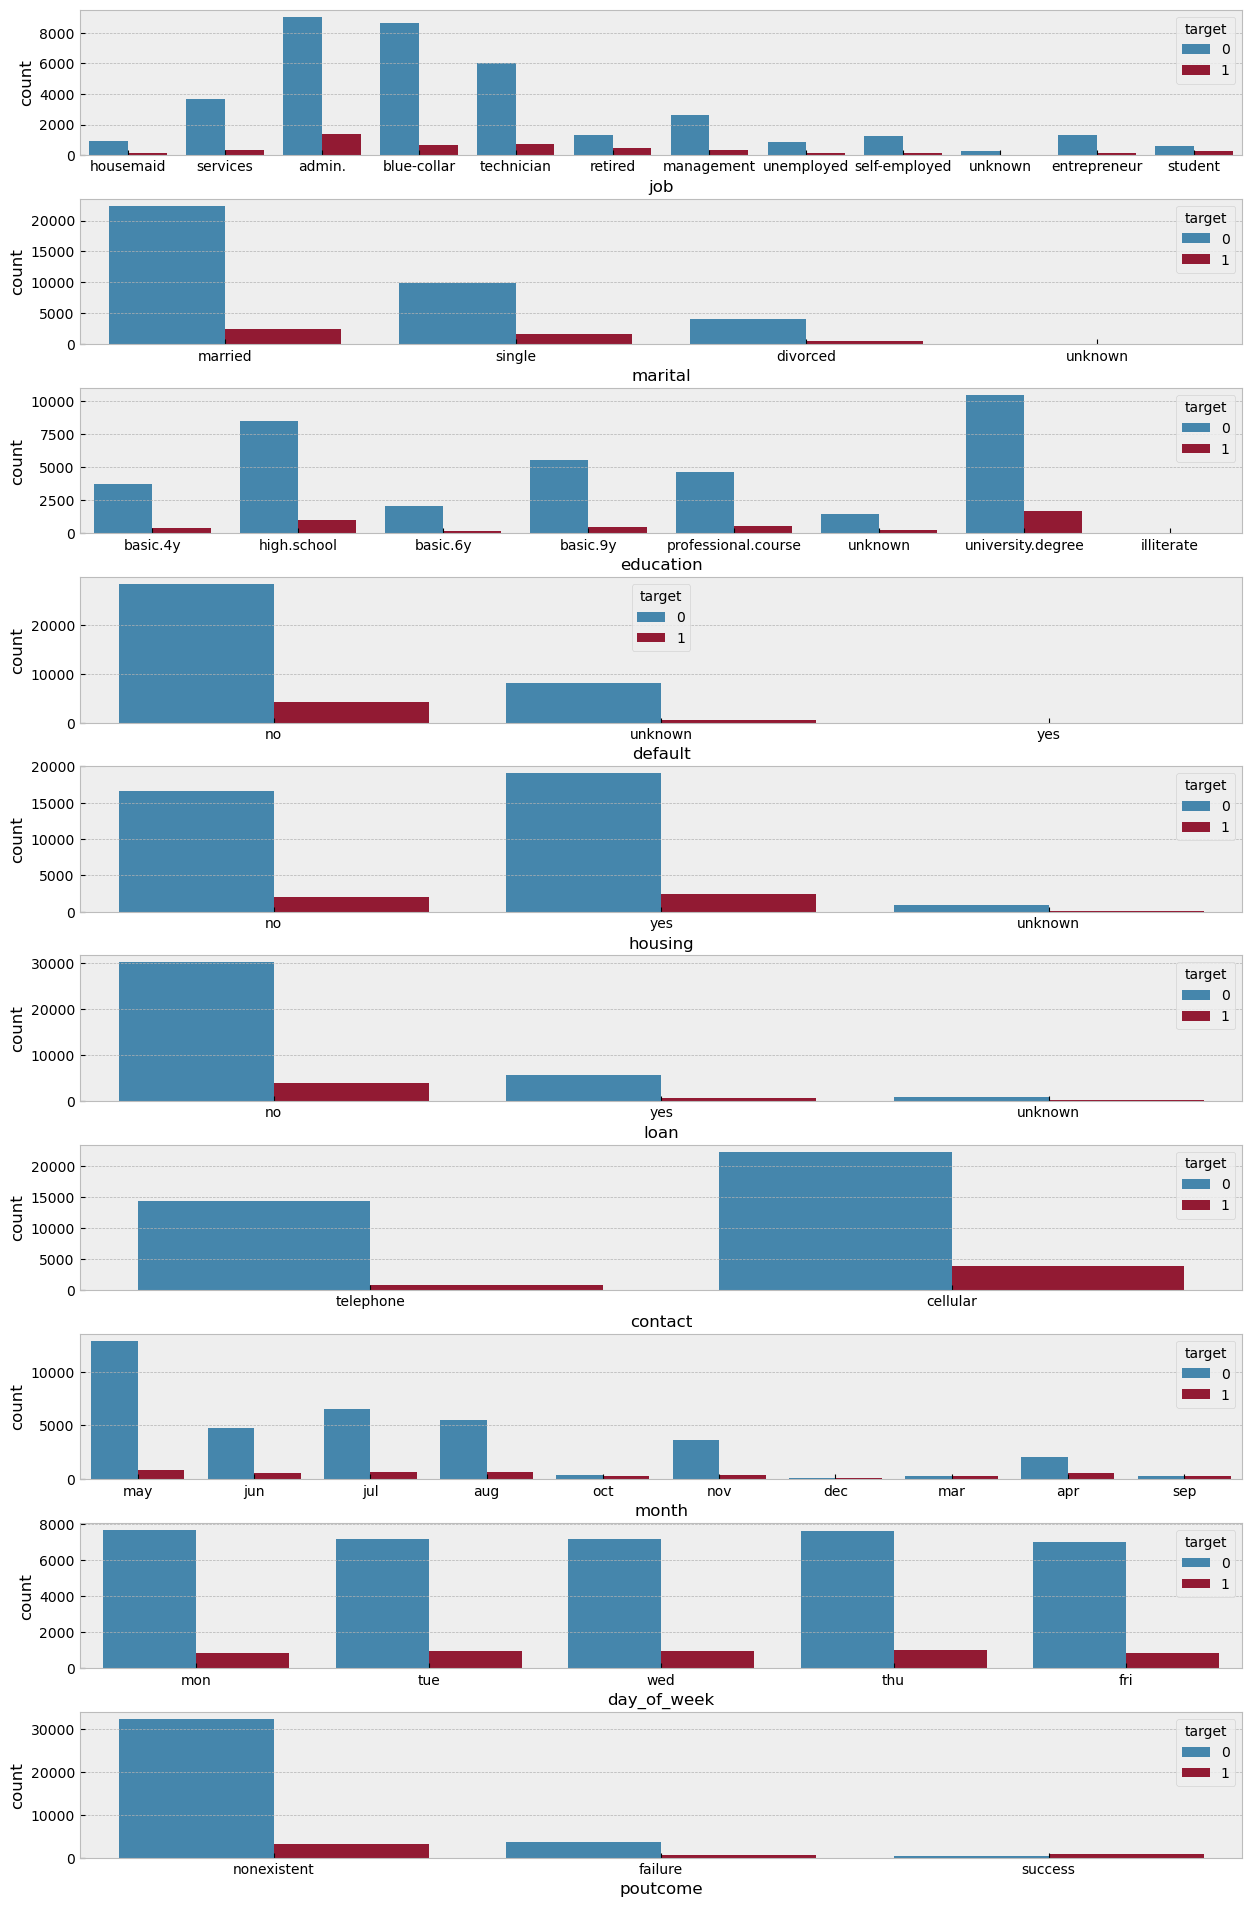

In [16]:
fig, axs = plt.subplots(10, figsize=(15,24))

for ind, feature in enumerate(df.select_dtypes('object')):
    sns.countplot(data=df, x=feature, hue='target', ax=axs[ind])
    
plt.subplots_adjust(hspace=0.3)

### Wnioski
- Najwiecej rozmow przeprowadza sie w okresie letnim.
- Znaczna wiekszosc osob juz bralo wlasna pozyczke.
- Podobna ilosc osob maja do splacenia kredyt mieszkaniowy, do osob ktore takowego kredytu nie posiadaja w ogole.
- Pomijalna ilosc osob, ktore maja do splacenia wlasny kredyt.
- Wiekszosc osob ma wyksztalcenie wyzsze, lub srednie.
- Wiecej niz polowa osob jest zareczona. Co wazniejsze, porownujac target dla osob, bedacych singlami, do osob bedacych zareczonych, to mimo ze singli jest dwa razy mniej, to ilosc osob, dla ktorych _target_ jest rowny __1__, jest podobna.
- Znaczna wiekszosc osob ze zbioru danych to; _technician_, _admin_, lub _blue collar_.

#### Kolumna _Day of week_ jest bezuzyteczna, gdyz dystrybucja obserwacji jest taka sama miedzy roznymi wartosciami w tym polu

In [17]:
df = df.drop('day_of_week', axis=1)

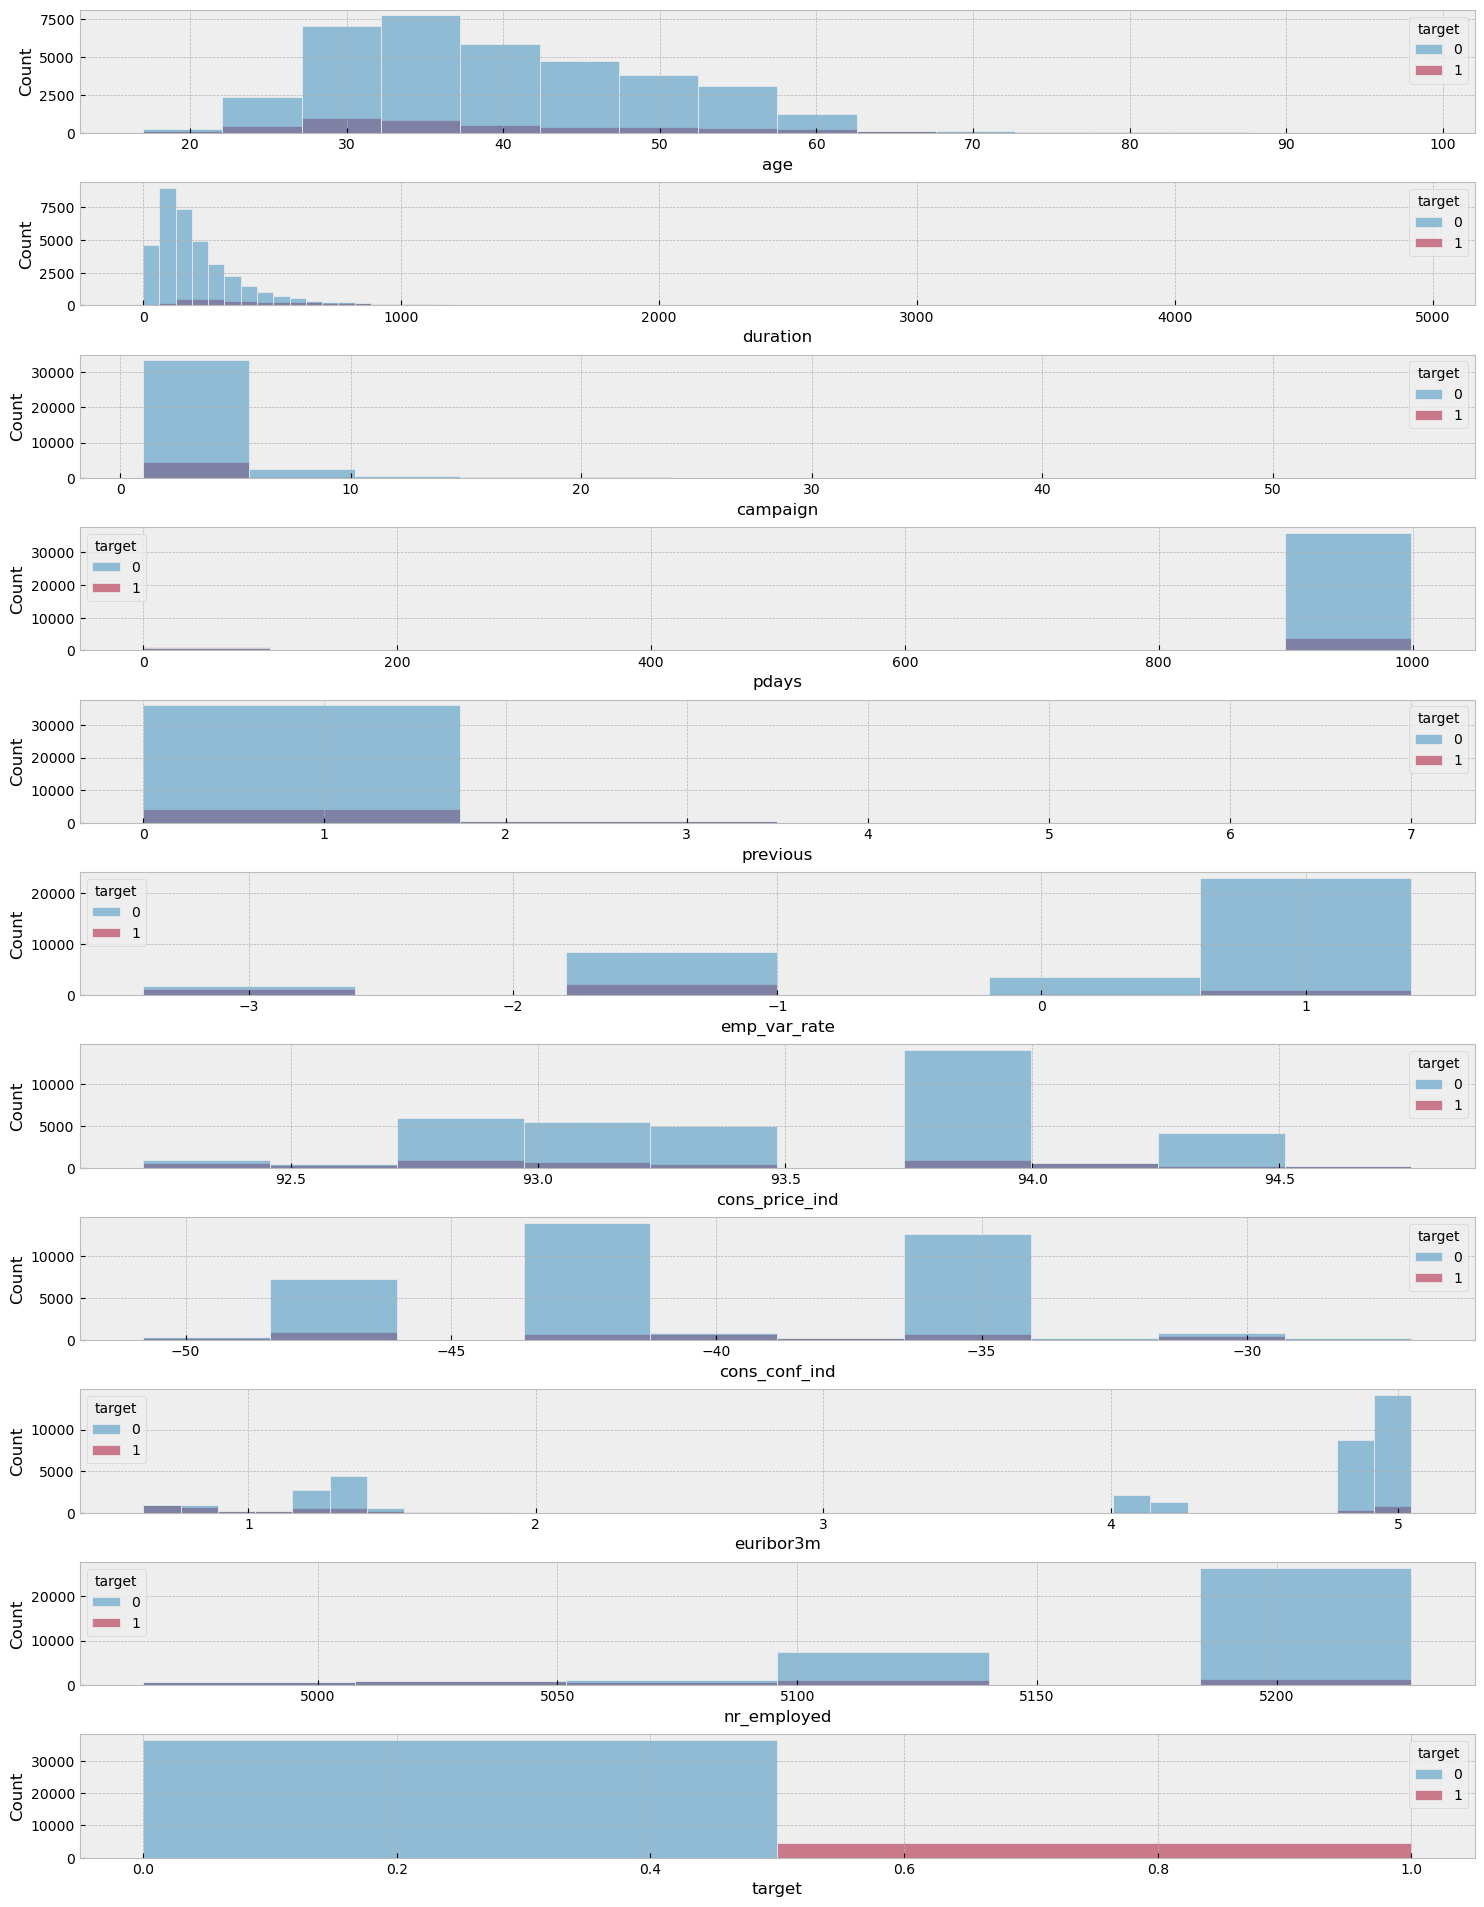

In [21]:
fig, axs = plt.subplots(11, figsize=(18,24))

for ind, feature in enumerate(df.select_dtypes(exclude='object')):
    sns.histplot(data=df, x=feature, hue='target', ax=axs[ind], bins=(2*int(np.sqrt(df[feature].nunique()))))
    
plt.subplots_adjust(hspace=0.4)

### Wnioski
- Im dłużej trwa rozmowa tym większa procentowo szansa na akceptację oferty.
- Głównym targetem kampanii byłu osoby między 27 a 37 rokiem życia.
- Nie warto przeprowadzać więcej niż około 5 rozmów z klientem oferując mu tę samą kampanię.
- Większość osób, które niedawno akceptowały poprzednią ofertę akceptują też tą oferte
- Ofertę akceptują głównie osoby, które rzadko zmieniają pracę
- Procentowo więcej osób akceptuję oferte gdy ich nr_employed jest mniejszy (około 4950-5050), pomimo faktu że głównym targetem były osoby z nr_employed około 5170-5230

<Figure size 2400x1800 with 0 Axes>

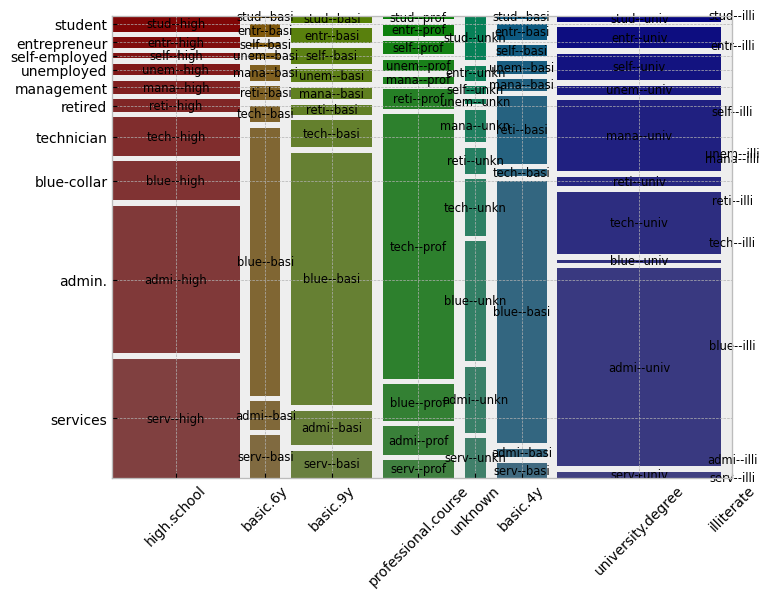

In [111]:
plt.figure(dpi=300, )
subset = df[~df['education'].isin(['unknown', 'illiterate'])]
subset = df[~df['job'].isin(['unknown', 'housemaid'])]
mosaic(subset, ['education', 'job'], labelizer=lambda x: ""+x[1][:4]+"--"+x[0][:4], label_rotation=[45,0],gap=0.02)
plt.show()

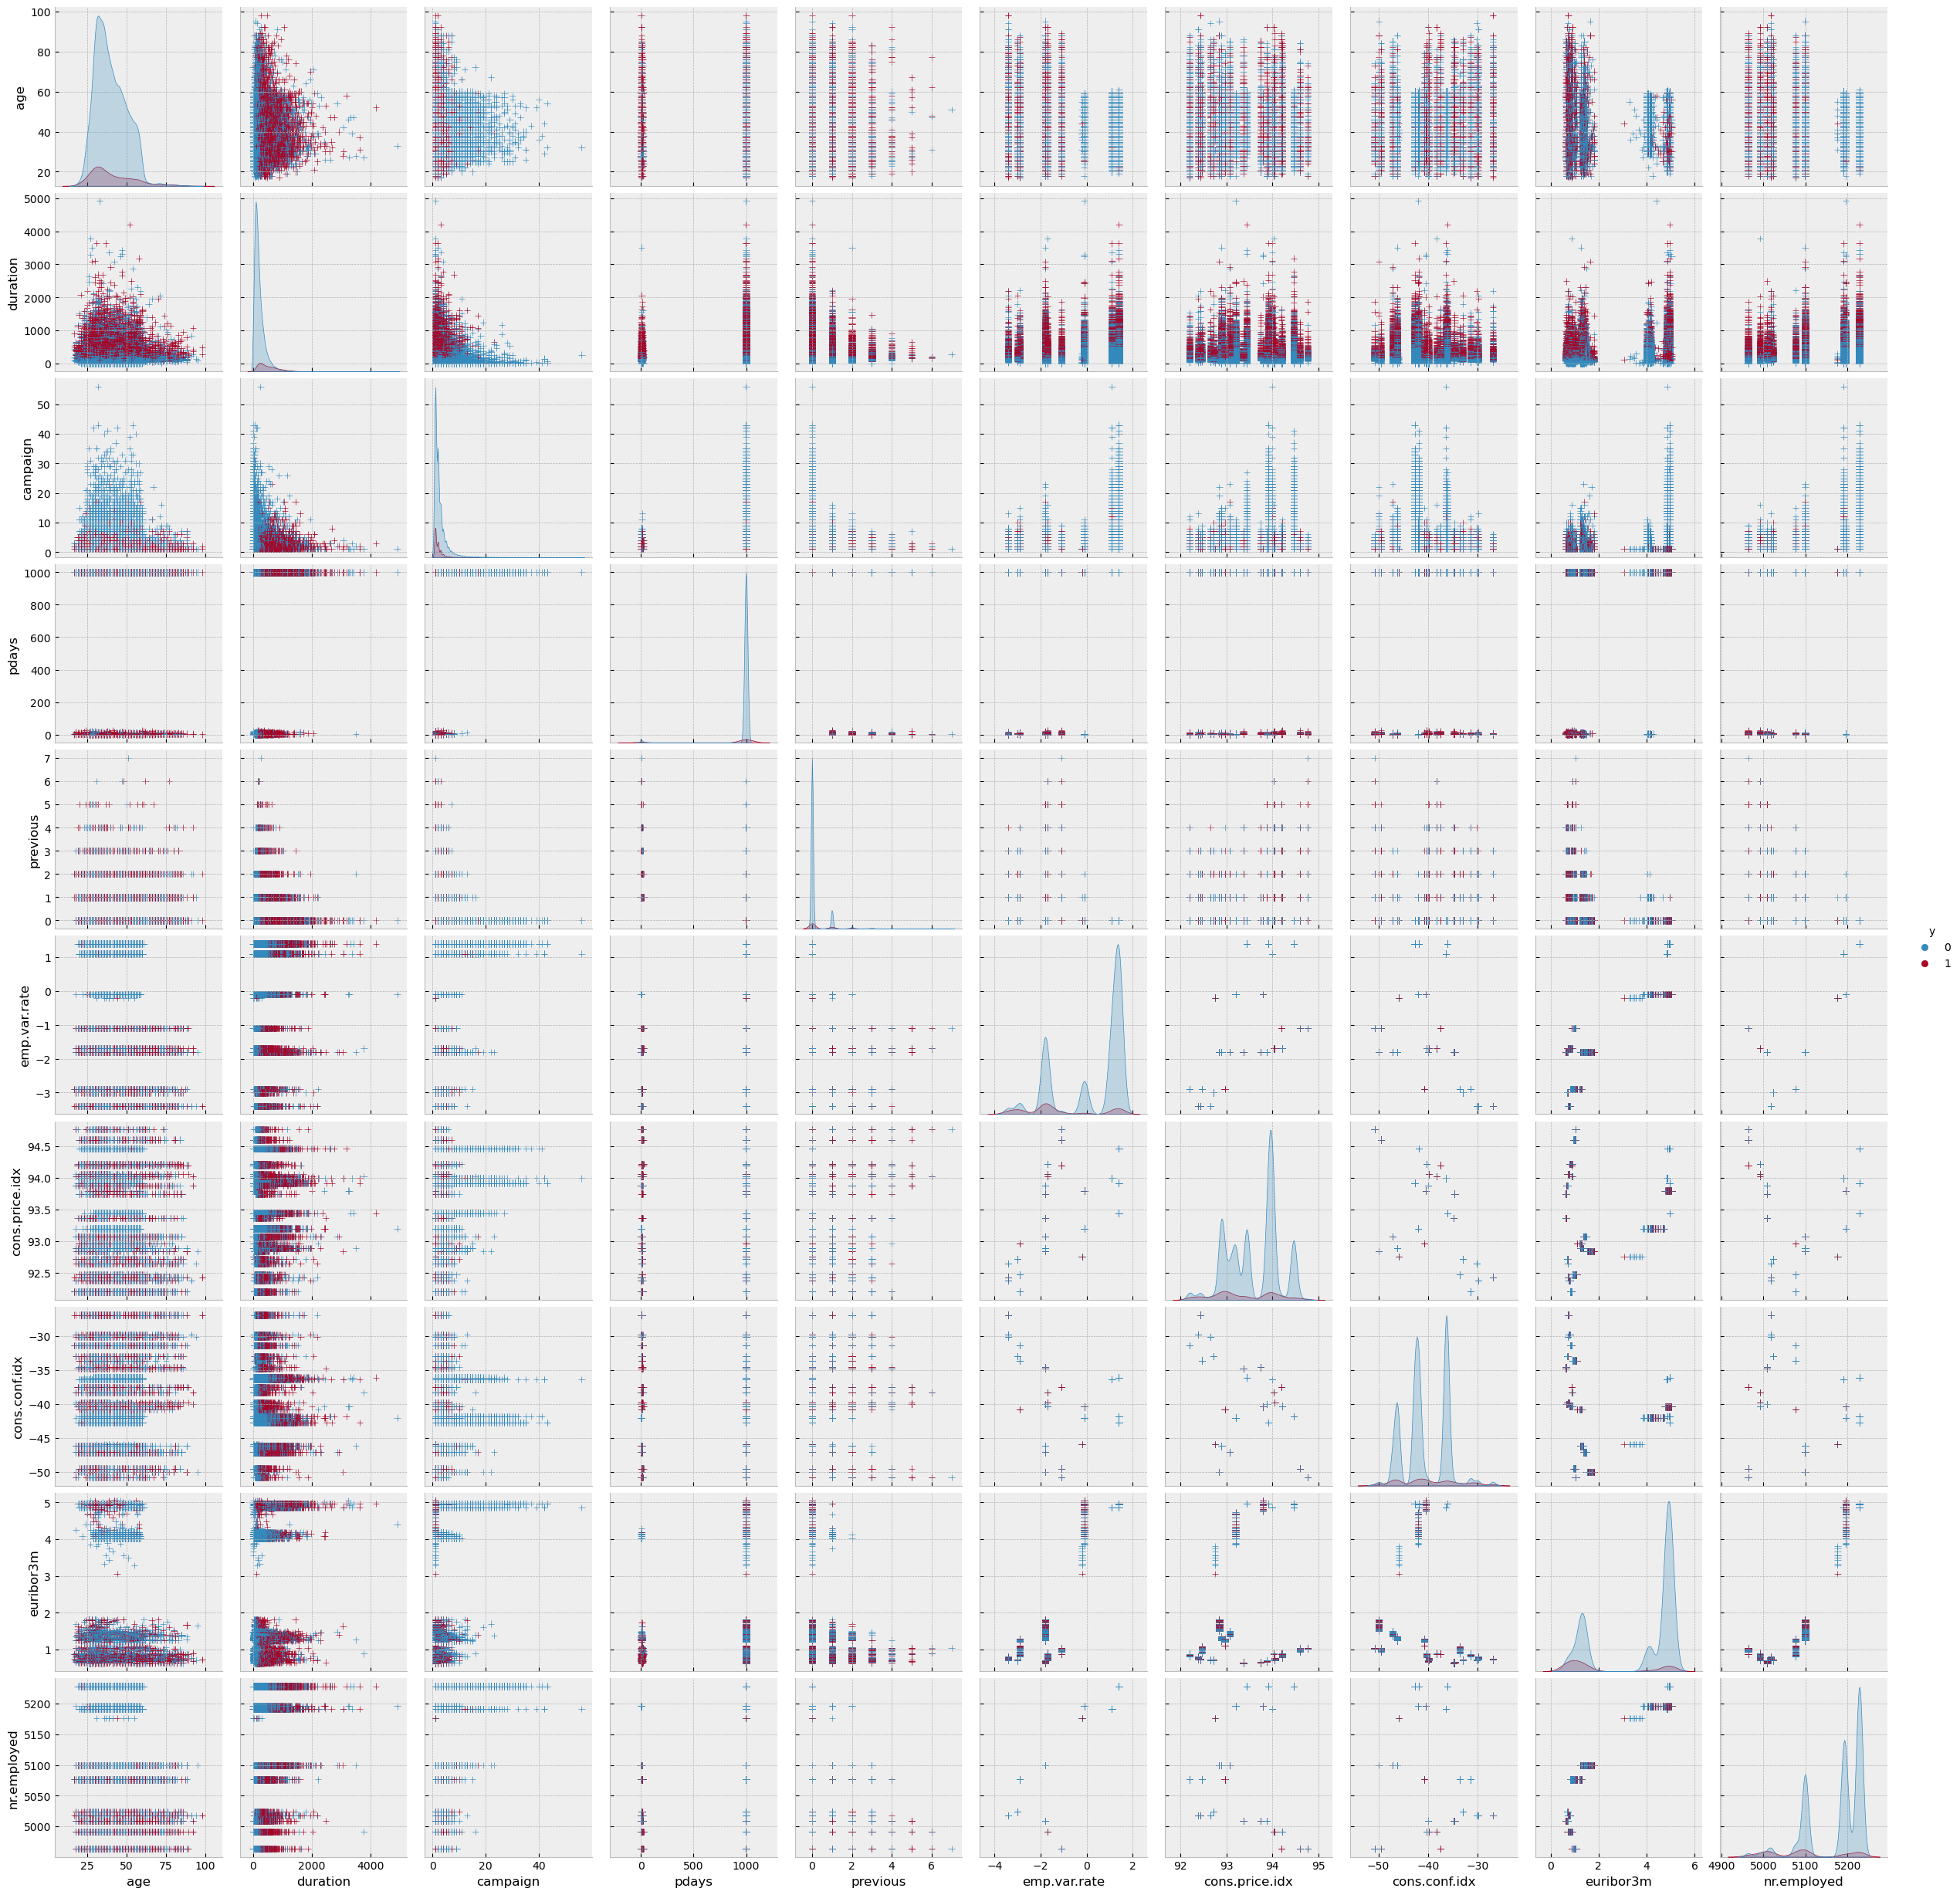

In [32]:
sns.pairplot(df.select_dtypes(exclude='object'), hue='y', markers='+', diag_kind='kde')

In [112]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_ind', 'cons_conf_ind',
       'euribor3m', 'nr_employed', 'target'],
      dtype='object')

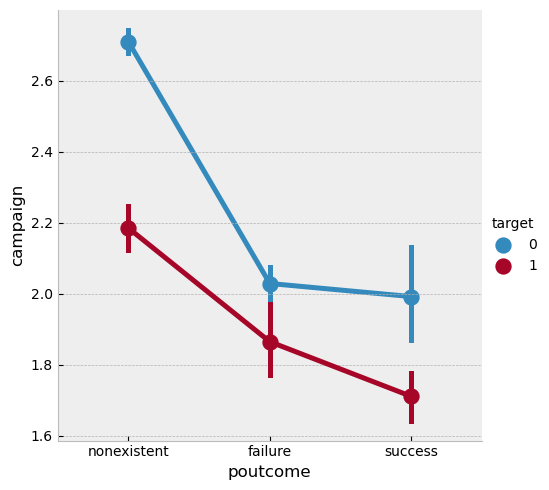

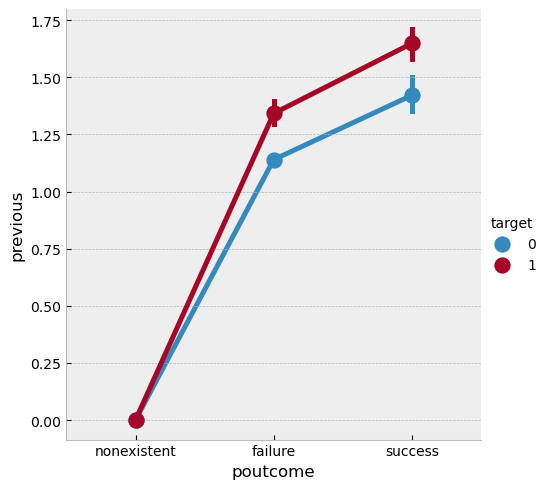

In [105]:
sns.catplot(hue='target', x='poutcome', y='campaign', kind='point', data=df, )
sns.catplot(hue='target', x='poutcome', y='previous', kind='point', data=df, )

<AxesSubplot:xlabel='age', ylabel='campaign'>

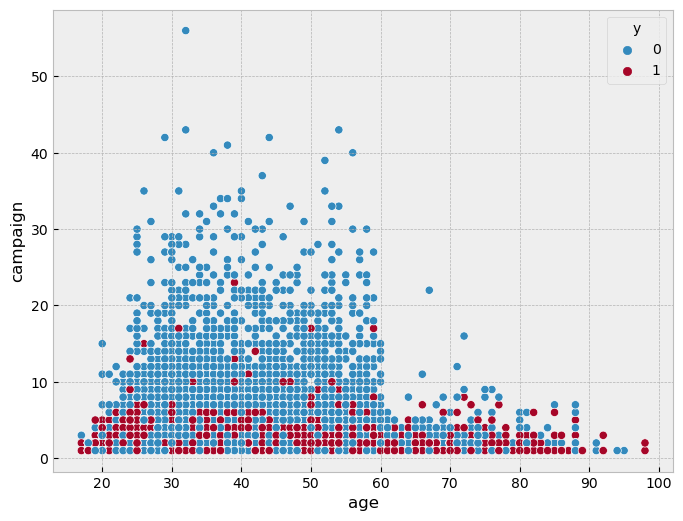

In [13]:
sns.scatterplot(data=df, x='age', y='campaign', hue='y')

<AxesSubplot:>

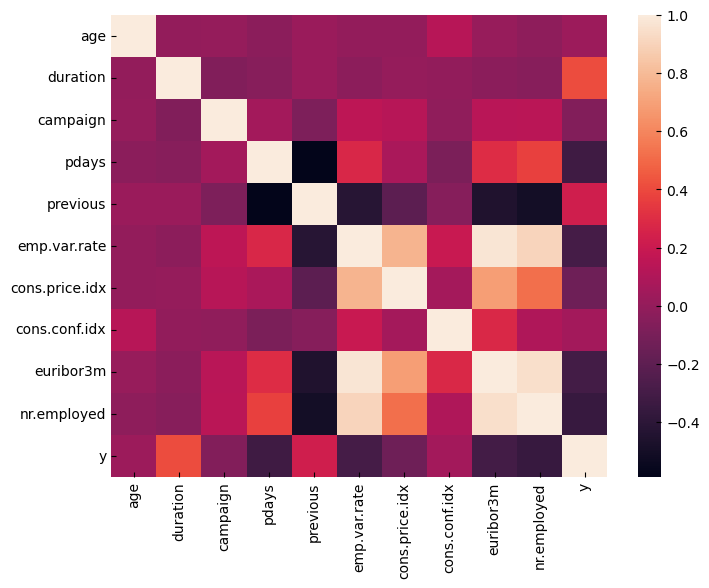

In [33]:
sns.heatmap(data=df.select_dtypes(exclude='object').corr(),)

### Wnioski z korelacji
- Kolumny euribor3m i nr.employed mają wysoki poziom korelacji warto rozważyć usunięcie jednej z tych kolumn ponieważ jej dane nie będą wnosiły wiele do modelu
- Podobna sytuacja występuje dla kolumn euribor3m i emp.var.rate

#### No data is missing

<AxesSubplot:>

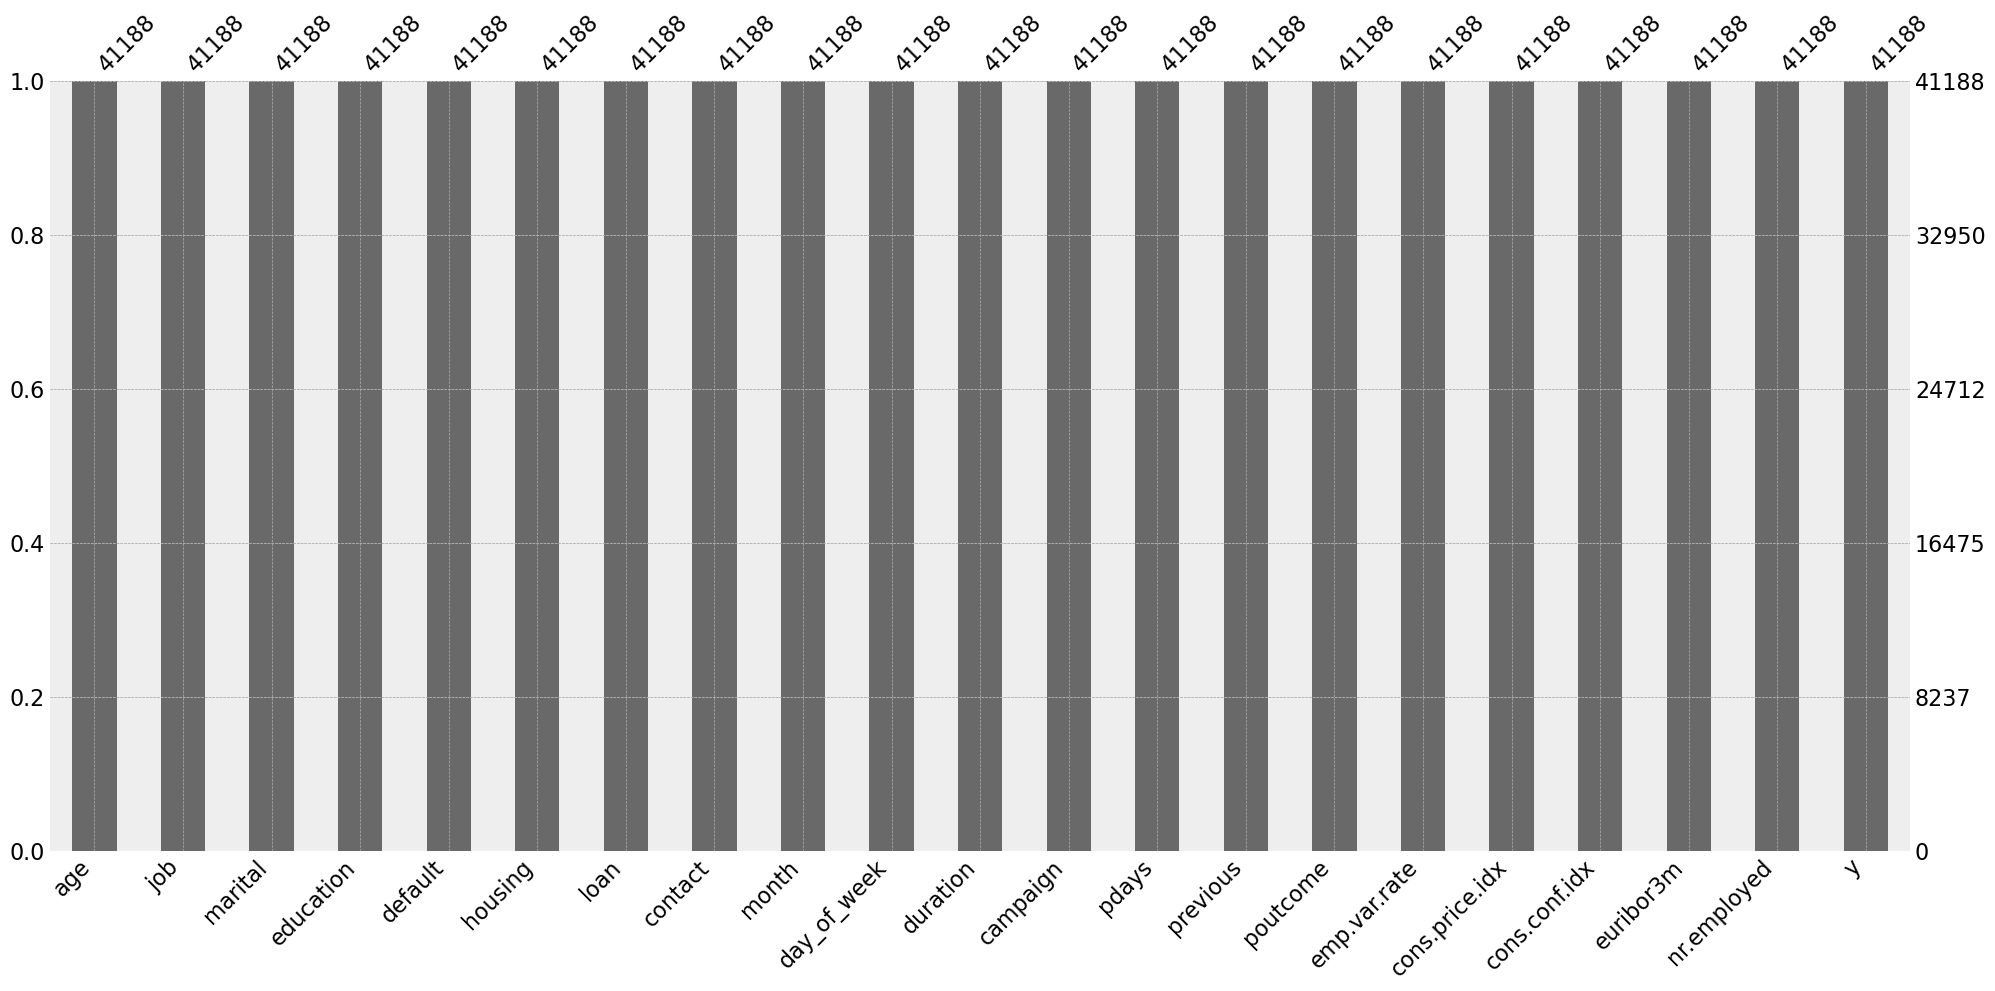

In [16]:
msno.bar(df)

#### Usuniecie wierszy zduplikowanych, czyli bedacych powtorzeniem wiersza, ktory wczesniej juz wystapil (te, nie sa brane pod uwage.

In [17]:
df = df.loc[~df.duplicated()]

In [87]:
from pandas_profiling import ProfileReport
pr = ProfileReport(df)
pr.to_file('pr', silent=False)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/home/kuba/anaconda3/lib/python3.9/site-packages/pandas_profiling/profile_report.py:310: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 2. Pytania, ktore moga potencjalnie naprowadzic na cechy, ktore maja wieksze znaczenie dla predykcji targetu:
- Zbior danych zawiera wiele kolumn bedacych tekstem. Z tego tez powodu, nalezy pochylic sie nad procesem zamiany tekstu na wartosci liczbowe za pomoca roznego typu procesow _encoding_.
- Czy kolumny zwiazane z _social and economic context attributes_ maja faktyczne znaczenie dla predykcji? Sa bowiem one zmienne w okresach kwartalnych/miesiecznych i sa niezmienne dla pewnej grupy obserwacji.
- 


# 3. Key takeaways
- Trzeba pamietac, ze _unknown_ mozna uznac za klase, lub zmapowac jako pd.NA, bo nie znamy tej wartosci. Warto przyjrzec sie poszczegolnym cechom, w ktorej mozna zaobserwowac obiekty o wartosci cech _unknown_ i sprobowac aproksymowac wartosc tej cechy, na podstawie grupy obiektow, lub tez wyrzucic te obiekty, ktore maja ceche _unknown_, jesli ilosc jej obserwacji jest znikoma na tle calego zbioru danych.
- Warto zmapowac kolumny yes/no/unkown na 1/0/-1
- wartosc __999__ w kolumnie _pdays_ oznacza, ze nie kontaktowano sie z dana osoba
- kolumna _duration_, nie powinna pod zadnym pozorem zostac uzyta do trenowania modelu, a jedynie jego walidacji

In [104]:
df.to_csv('data/precleaned')